# Correlated Random Dot Product Graph (RDPG) Graph Pair

In [1]:
from graspologic.simulations.rdpg_corr import rdpg_corr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RDPG is a latent position generative model. An explanation of the uncorrelated model is in the [tutorial](https://graspy.neurodata.io/tutorials/simulations/rdpg.html).

Here, we want to generate a pair of graphs with the same latent positions but with correlation between edges. 

There are several parameters in this function: $X$ and $Y$ are the input matrices (latent positions) which are used to generate the probability matrix; $r$ is the correlation between the graph pair, which should be (-1,1) (note that not all values of r may be possible for a given set of latent positions).

Below, we sample a RDPG graph pair (undirected and no self-loops), G1 and G2, with the following parameters:
\begin{align*}
n &= [50, 50]\\
r &= 0.5
\end{align*}

In [2]:
np.random.seed(1234)
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
Y = None
r = 0.3

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)

In [3]:
X @ X.T

array([[0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       [0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       [0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       ...,
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03],
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03],
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03]])

## Visualize the graphs using heatmap
Here, we define *difference rate* to be the number of edges between the two graphs which are not the same (exist or not exist) out of all potential edges (roughly $n^2$)

Difference rate is  0.1438


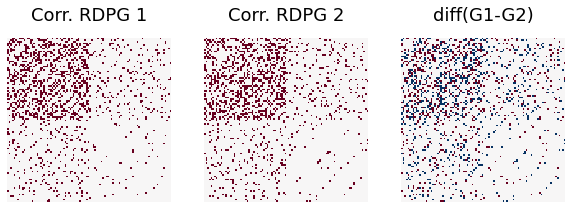

In [4]:
from graspologic.plot import heatmap

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title = 'Corr. RDPG 1')
heatmap(G2, ax=axs[1], cbar=False, title = 'Corr. RDPG 2')
heatmap(G1-G2, ax=axs[2], cbar=False, title='diff(G1-G2)')
ndim=G1.shape[0]
print("Difference rate is ", np.sum(abs(G1-G2))/(ndim*ndim))

## Compare it to the correlated SBM graph pair

Below, we sample a two-block SBM graph pair (undirected and no self-loops) G1 and G2 with the following parameters:

\begin{align*}
n &= [50, 50]\\
p &= \begin{bmatrix} 
0.33 & 0.09\\
0.09 & 0.03
\end{bmatrix}\\
r &= 0.5
\end{align*}

This happens to be the SBM formulation of the same model framed as an RDPG above. Let's see the difference between the correlated RDPG and correlated SBM graph pairs.

Difference rate with sbm_corr function is  0.145


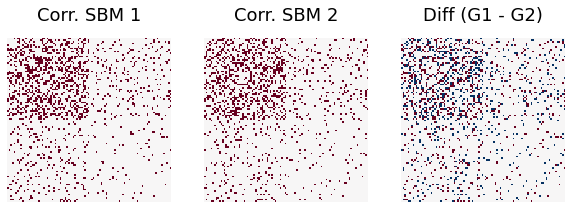

In [5]:
from graspologic.simulations import sbm_corr

np.random.seed(123)
directed = False
loops = False
n_per_block = 50
n_blocks = 2
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = .3
block_probs = np.array([[0.33, 0.09], [0.09, 0.03]])

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Corr. SBM 1")
heatmap(A2, ax=axs[1], cbar=False, title="Corr. SBM 2")
heatmap(A1 - A2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")

ndim=G1.shape[0]
print("Difference rate with sbm_corr function is ", np.sum(abs(A1-A2))/(ndim*ndim))

We can see the difference between G1 and G2 with both functions are similar.

## Varying the correlation

We change the correlation between the graph pairs from -0.5 to 0.9 and see the difference between graph 1 and graph 2:

Difference rate when correlation = -0.5 is  0.7332


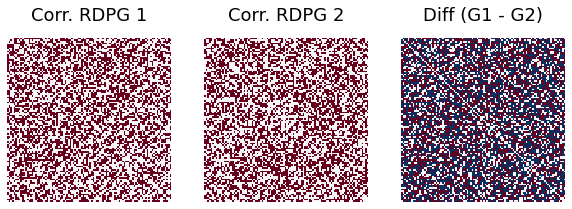

In [6]:
X = np.random.dirichlet([10, 10], size=100)
Y = None

np.random.seed(12345)
r = -0.5

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation = -0.5 is ", np.sum(abs(G1-G2))/(ndim*ndim))

Difference rate when correlation =0.3 is  0.3544


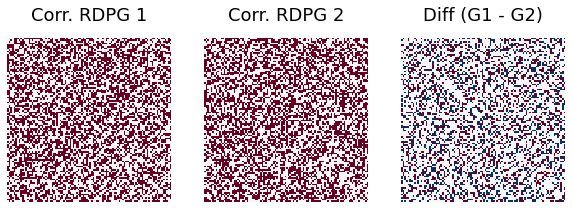

In [7]:
np.random.seed(12345)
r = 0.3

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation =0.3 is ", np.sum(abs(G1-G2))/(ndim*ndim))

Difference rate when correlation =0.9 is  0.0508


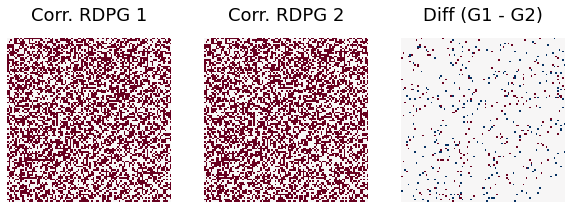

In [8]:
np.random.seed(12345)
r = 0.9

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation =0.9 is ", np.sum(abs(G1-G2))/(ndim*ndim))

We calculate the difference rate between graph 1 and graph 2 with different correlation ranging from -0.5 to 0.9, and show them in a scatter plot:

In [9]:
np.random.seed(12345)
X = np.random.dirichlet([10, 10], size=100)
Y = None
rlist=[]
for i in range(-5,10):
    g1,g2 = rdpg_corr(X, Y, i/10, rescale=False, directed=False, loops=False)
    ndim=g1.shape[0]
    rate=np.sum(abs(g1-g2))/(ndim*ndim)
    rlist.append(rate)

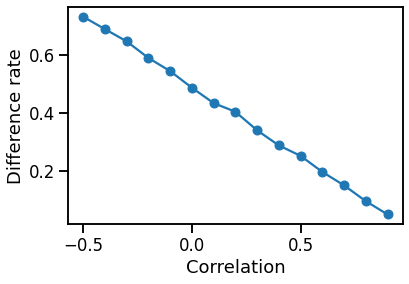

In [10]:
x_list = np.linspace(-0.5,0.9,15)
plt.plot(x_list,rlist,'o-')
plt.xlabel("Correlation")
_ = plt.ylabel('Difference rate')

We can see that the difference rate goes down as the correlation grows.